In [14]:
import torch
from torchmetrics.functional.image import image_gradients

from kornia.filters import SpatialGradient

In [6]:
a = torch.randint(0, 255, (64, 1, 256, 256)).float()
a.requires_grad = True

In [12]:
b = image_gradients(a)

In [15]:
spt_grad = SpatialGradient('sobel')
b = spt_grad(a)

In [19]:
b[:, :, 1]

tensor([[[[-11.0000, -39.5000, -22.1250,  ...,  15.0000,  24.1250,  52.0000],
          [ 78.0000,  45.7500,  28.1250,  ..., -32.1250,   8.6250,  77.2500],
          [ 31.0000,  52.7500,  67.5000,  ...,  -2.5000, -17.3750, -18.0000],
          ...,
          [-18.2500,  24.7500,   3.5000,  ..., -20.7500, -21.7500, -35.1250],
          [-36.7500, -18.7500,  43.6250,  ..., -13.5000,  13.7500,  72.2500],
          [-16.3750, -28.7500,  -0.2500,  ..., -30.2500,   2.5000,  73.1250]]],


        [[[ 42.5000,  24.0000,  -5.1250,  ...,  -1.7500,   7.8750,  -7.6250],
          [-17.5000,  30.8750,  46.5000,  ...,  23.7500,   2.6250, -33.6250],
          [-68.3750, -39.7500,   2.0000,  ..., -68.2500, -59.3750, -28.6250],
          ...,
          [-45.1250, -30.2500, -18.5000,  ...,  12.3750,   7.2500,   2.6250],
          [-36.1250,  14.6250,  14.5000,  ...,  15.2500,  41.2500,   9.2500],
          [-17.0000,  -8.8750,   5.8750,  ...,  19.6250,  40.8750, -14.3750]]],


        [[[  0.5000,   5.5

# Check if volumes where stored correctly

In [4]:
import numpy as np
def distribute_n_in_m_slots(n, m):
    elements_per_slot = n // m
    slots_with_extra_element = n % m
    equitably_dist_list = slots_with_extra_element * [elements_per_slot + 1] + \
        (m - slots_with_extra_element) * [elements_per_slot]
    np.random.shuffle(equitably_dist_list)

    return equitably_dist_list


In [55]:
import torch

def stratified_sampling(a, b, m, n) -> np.ndarray:
    """
    Perform stratified sampling of n integers in a range [a, b] split into m buckets.

    Parameters:
    a (int): Lower bound of the range (inclusive)
    b (int): Upper bound of the range (inclusive)
    m (int): Number of buckets to stratify on
    n (int): Number of samples to draw

    Returns:
    samples (np.ndarray): Tensor of n stratified samples
    """
    assert b > a, "Upper bound must be greater than lower bound"
    assert m > 0, "Number of buckets must be greater than 0"
    
    if n < m:
        print("Warning: Number of samples is less than number of groups to stratify on")
    
    bucket_size = (b - a + 1) // m
    buckets = np.arange(a, b + 1, bucket_size)
    buckets = [(buckets[i], buckets[i+1] + 1) for i in range(len(buckets) - 1)]
    np.random.shuffle(buckets)

    draws = distribute_n_in_m_slots(n, m)
    draws = [i for i in draws if i > 0]

    sampled_t = []
    for draw_n in draws:
        bucket_start, bucket_end = buckets.pop(0)
        sampled_t.append(
            np.random.randint(bucket_start, bucket_end, (draw_n,))
        )
        
    return np.concatenate(sampled_t)

In [61]:
t_values = torch.full((128,), np.random.randint(0, 1000), dtype=torch.int32)
t_values

tensor([262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262,
        262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262,
        262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262,
        262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262,
        262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262,
        262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262,
        262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262,
        262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262,
        262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262,
        262, 262], dtype=torch.int32)

In [56]:
type(stratified_sampling(19, 979, 62, 3))

numpy.ndarray

In [16]:
a = 19
b = 979
m = 64
n = 8

In [17]:
distribute_n_in_m_slots(n, m)

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

In [24]:
bucket_size = (b - a + 1) // m
buckets = np.arange(a, b + 1, bucket_size)
samples = torch.empty(n, dtype=torch.int)


In [25]:
bucket_size

15

In [37]:
buckets_ = [(buckets[i], buckets[i+1] + 1) for i in range(len(buckets) - 1)]
buckets_

[(19, 35),
 (34, 50),
 (49, 65),
 (64, 80),
 (79, 95),
 (94, 110),
 (109, 125),
 (124, 140),
 (139, 155),
 (154, 170),
 (169, 185),
 (184, 200),
 (199, 215),
 (214, 230),
 (229, 245),
 (244, 260),
 (259, 275),
 (274, 290),
 (289, 305),
 (304, 320),
 (319, 335),
 (334, 350),
 (349, 365),
 (364, 380),
 (379, 395),
 (394, 410),
 (409, 425),
 (424, 440),
 (439, 455),
 (454, 470),
 (469, 485),
 (484, 500),
 (499, 515),
 (514, 530),
 (529, 545),
 (544, 560),
 (559, 575),
 (574, 590),
 (589, 605),
 (604, 620),
 (619, 635),
 (634, 650),
 (649, 665),
 (664, 680),
 (679, 695),
 (694, 710),
 (709, 725),
 (724, 740),
 (739, 755),
 (754, 770),
 (769, 785),
 (784, 800),
 (799, 815),
 (814, 830),
 (829, 845),
 (844, 860),
 (859, 875),
 (874, 890),
 (889, 905),
 (904, 920),
 (919, 935),
 (934, 950),
 (949, 965),
 (964, 980)]

In [40]:
torch.randint(0, 2, (100,))

tensor([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
        0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0])

In [32]:
# Shuffle the buckets
np.random.shuffle(buckets_)

In [33]:
buckets_

[(274, 289),
 (679, 694),
 (574, 589),
 (694, 709),
 (889, 904),
 (409, 424),
 (289, 304),
 (604, 619),
 (904, 919),
 (394, 409),
 (589, 604),
 (964, 979),
 (334, 349),
 (79, 94),
 (199, 214),
 (934, 949),
 (64, 79),
 (94, 109),
 (424, 439),
 (259, 274),
 (949, 964),
 (379, 394),
 (49, 64),
 (619, 634),
 (844, 859),
 (799, 814),
 (34, 49),
 (184, 199),
 (814, 829),
 (229, 244),
 (109, 124),
 (514, 529),
 (859, 874),
 (154, 169),
 (634, 649),
 (124, 139),
 (304, 319),
 (544, 559),
 (319, 334),
 (709, 724),
 (649, 664),
 (214, 229),
 (169, 184),
 (439, 454),
 (784, 799),
 (454, 469),
 (739, 754),
 (754, 769),
 (364, 379),
 (349, 364),
 (829, 844),
 (874, 889),
 (139, 154),
 (724, 739),
 (244, 259),
 (499, 514),
 (559, 574),
 (919, 934),
 (19, 34),
 (469, 484),
 (769, 784),
 (664, 679),
 (529, 544),
 (484, 499)]

In [ ]:

for i in range(n):
    bucket_idx = i % m
    bucket_start = buckets[bucket_idx]
    bucket_end = bucket_start + bucket_size - 1
    samples[i] = torch.randint(bucket_start, bucket_end + 1, (1,)).item()

In [21]:
import h5py
import matplotlib.pyplot as plt

old_preproc_dataset = h5py.File('/scratch_net/biwidl319/jbermeo/data/wmh_miccai/vu/data_vu_2d_size_256_256_depth_48_res_1_1_3_from_0_to_10.hdf5', 'r')
new_preproc_dataset = h5py.File('/scratch_net/biwidl319/jbermeo/data/wmh_miccai/vu/data_vu_2d_size_256_256_depth_48_res_1_1_3_from_0_to_10_w_synthseg_labels.hdf5', 'r')

old_images = old_preproc_dataset['images'][:]
old_labels = old_preproc_dataset['labels'][:]

new_labels = new_preproc_dataset['labels'][:]
new_images = new_preproc_dataset['images'][:]

In [22]:
print((old_labels == 1).sum())
print((new_labels == 16).sum()) 

29696
29696


In [23]:
((old_labels == 1) == (new_labels == 16)).all()

True

In [24]:
(old_images == new_images).all()

True

In [25]:
import numpy as np
import nibabel as nib

vol_0_nii = nib.load('/scratch_net/biwidl319/jbermeo/data/wmh_miccai/preprocessed_vols_as_nifti_files/vu/train/imgs/vol_0.nii.gz')
vol_0_labels_nii = nib.load('/scratch_net/biwidl319/jbermeo/data/wmh_miccai/preprocessed_vols_as_nifti_files/vu/train/labels/vol_0_label.nii.gz')


In [26]:

assert (vol_0_nii.get_fdata() == np.transpose(old_images[0:48], (1, 2, 0))).all()
assert (vol_0_labels_nii.get_fdata() == np.transpose(old_labels[0:48], (1, 2, 0))).all()

### Verify the segmentation mask is not shifted

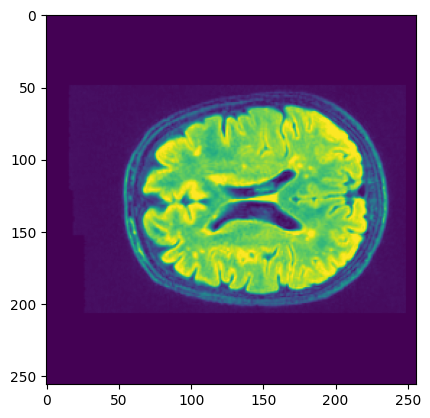

In [27]:
z = 27
img_0 = new_images[z]
label_0 = new_labels[z]
plt.imshow(img_0)

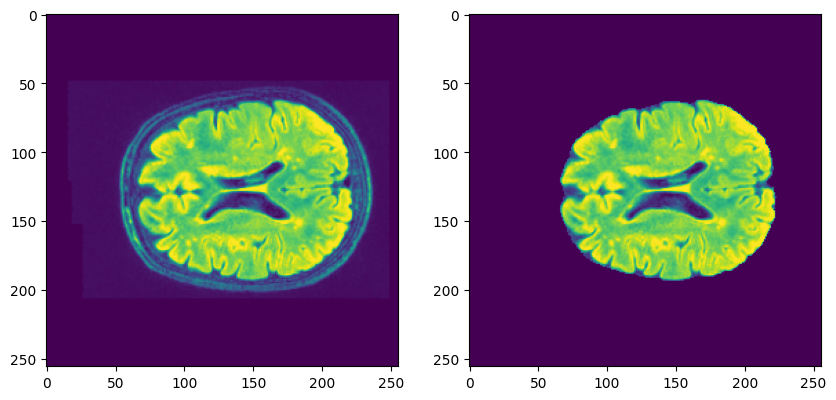

In [28]:
# Plot side by side the original image and a slice of the new labels
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_0)
plt.subplot(1, 2, 2)
plt.imshow((label_0!=0) * img_0)

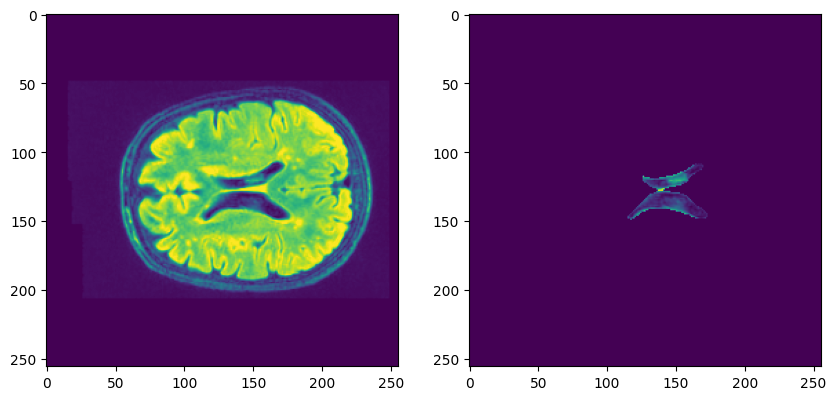

In [31]:
# Plot side by side the original image and a slice of the new labels
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_0)
plt.subplot(1, 2, 2)
plt.imshow((label_0 ==8) * img_0)

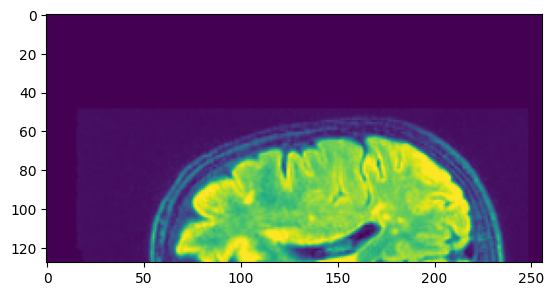

In [30]:
plt.imshow(img_0[0:128])

In [54]:
label_0.shape

(256, 256)

### Check this does not happen with nii volumes

In [62]:
vol_0_nii = nib.load('/scratch_net/biwidl319/jbermeo/data/wmh_miccai/preprocessed_vols_as_nifti_files/umc/train/imgs/vol_0.nii.gz')
vol_0_labels_nii = nib.load('/scratch_net/biwidl319/jbermeo/data/wmh_miccai/preprocessed_vols_as_nifti_files/umc/train/labels/vol_0_label.nii.gz')

In [68]:
vol_0_nii.affine

array([[ 1.,  0.,  0.,  0.],
       [-0., -1., -0., -0.],
       [ 0.,  0.,  3.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [70]:
vol_0_labels_nii.affine

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

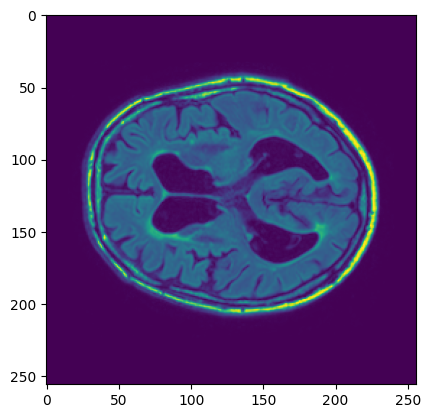

In [64]:
z = 24
img_0 = vol_0_nii.get_fdata()[:, :, z]
label_0 = vol_0_labels_nii.get_fdata()[:, :, z]
plt.imshow(img_0)

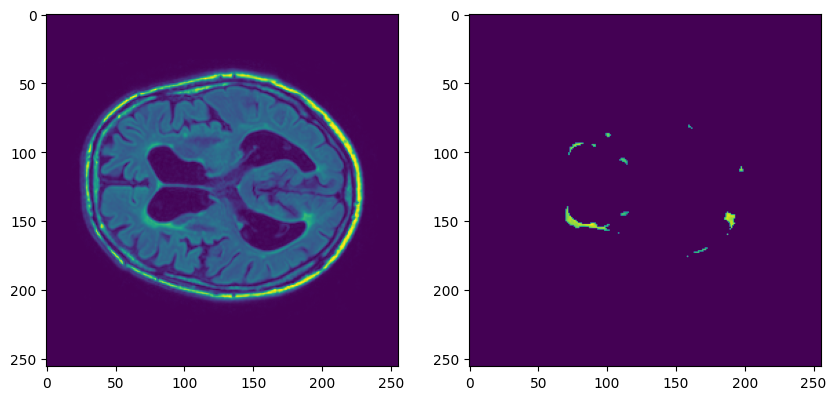

In [67]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_0)
plt.subplot(1, 2, 2)
plt.imshow((label_0== 1) * img_0)

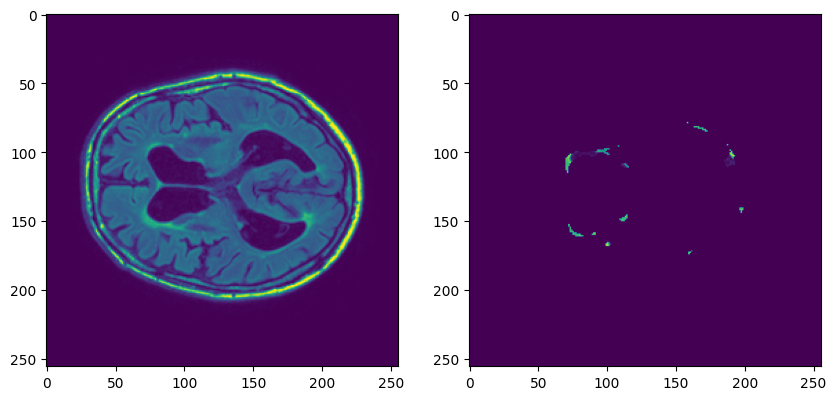

In [65]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_0)
plt.subplot(1, 2, 2)
plt.imshow((np.flip(label_0, axis=0)==1) * img_0)

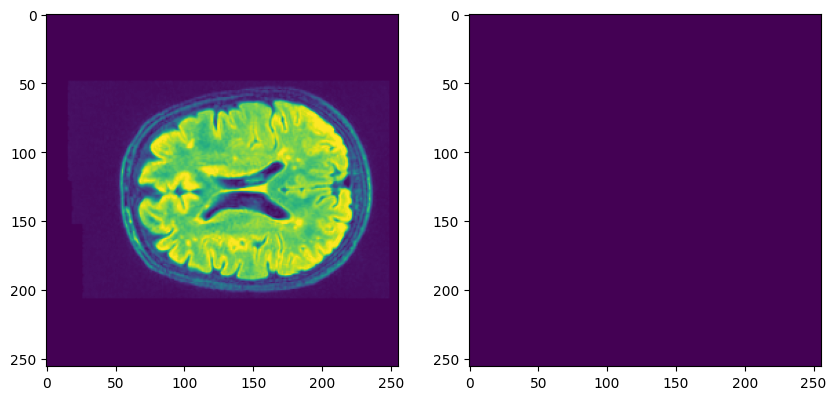

In [60]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_0)
plt.subplot(1, 2, 2)
plt.imshow((np.flip(label_0, axis=0)==8) * img_0)

## kornia, differentiable SIFT descriptor 

In [1]:
import torch
from kornia.feature import SIFTDescriptor

In [25]:
input = torch.rand(8, 1, 256, 256)
# create patches of size 32x32 for the input
input = input.unfold(-2, 32, 32).unfold(-2, 32, 32)
input.shape

torch.Size([8, 1, 8, 8, 32, 32])

In [11]:
input.reshape(-1, 1, 32, 32).shape

torch.Size([512, 1, 32, 32])

In [12]:
SIFT = SIFTDescriptor(16, 8, 4)
descs = SIFT(input.reshape(-1, 1, 32, 16)) # 23x128

In [26]:
def describe_image_sift(image, sift, patch_size=32):
    image = image.unfold(-2, patch_size, patch_size).unfold(-2, patch_size, patch_size)
    descs = SIFT(image.reshape(-1, 1, patch_size, patch_size))
    return descs

In [34]:
input = torch.rand(4, 1, 512, 512)

SIFT = SIFTDescriptor(32, 8, 4)

a = describe_image_sift(input, patch_size=32)

In [35]:
# Load a volume

# Pick a slice of the volume

# Generate very low contrast versions of that image

# compare the SIFT descriptors of the original and the low contrast version

# Compare the SIFT descriptors of the original and the normalized version of the original

# Compare the SIFT descriptors of the original and data augmented versions of the original

torch.Size([1024, 128])

# DAE debugging

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/scratch_net/biwidl319/jbermeo/logs/brain/tta/debugging/dae_only/3_08/lr_1em3_grad_acc_1x1_conv_norm_dae_and_ddpm_script_juan_testset_v2/dice_scores_hcp_t2_per_step_start_vol_0_stop_vol_20.csv',
                 index_col=0)

<Axes: >

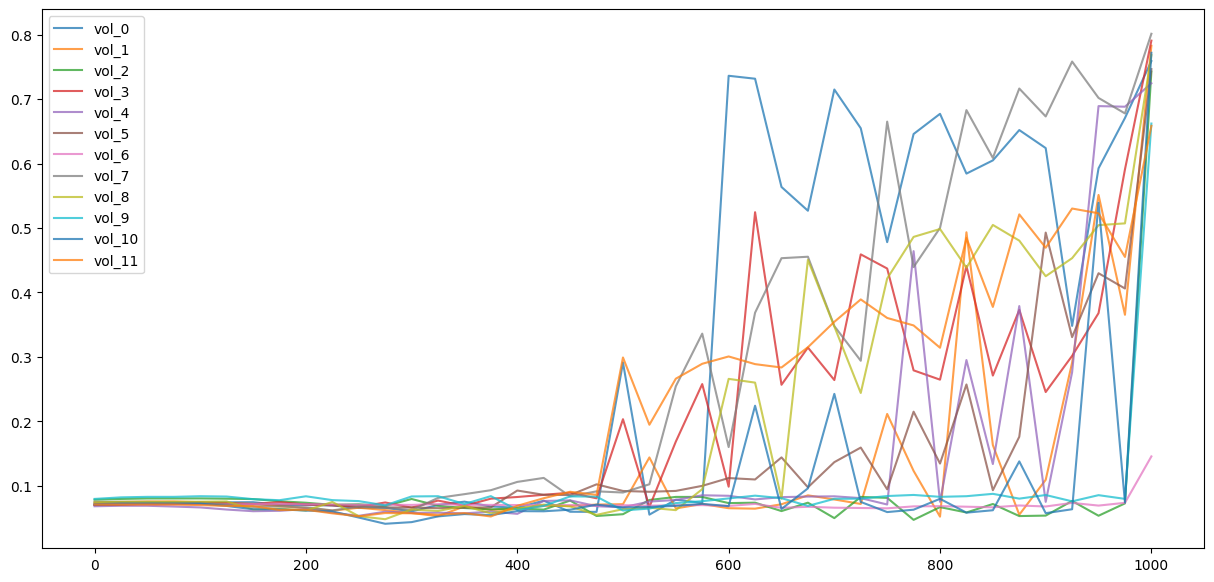

In [8]:
# Make a line plot of all columns of figsize 15, 7
df.plot(kind='line', figsize=(15, 7), alpha=0.75)

<Axes: >

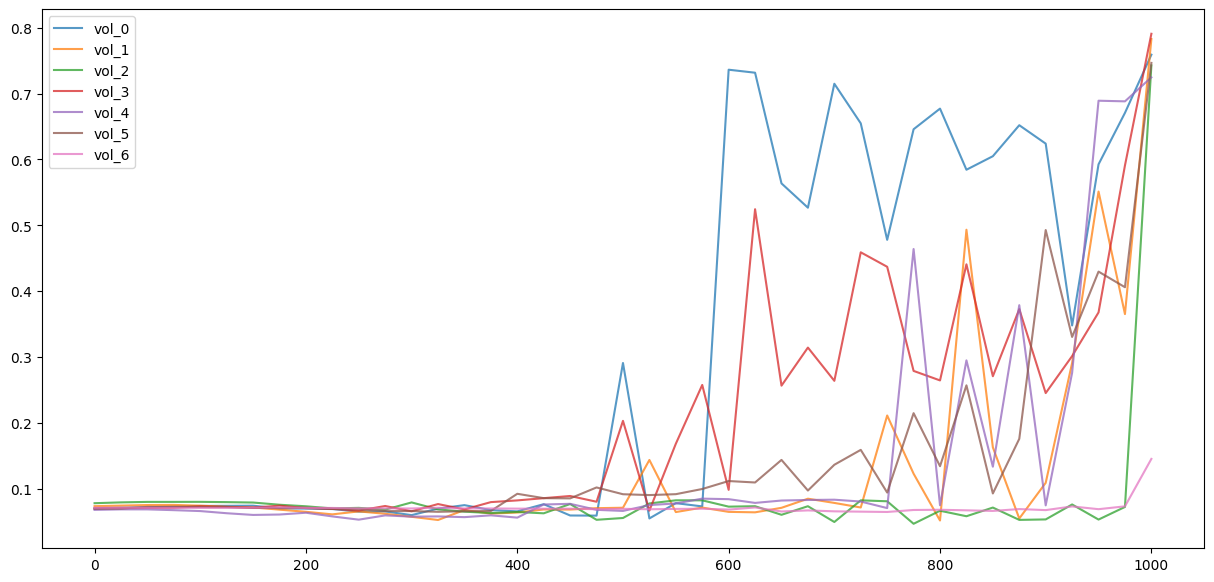

In [11]:
# Make a line plot of all columns of figsize 15, 7
vols = [0, 1, 2, 3, 4, 5 , 6]
cols = [col for col in df.columns if int(col.split('_')[-1]) in vols]
df[cols].plot(kind='line', figsize=(15, 7), alpha=0.75)

# Older random stuff

In [6]:
import os
import sys
import glob

sys.path.append(os.path.join(".."))
from tta_uia_segmentation.src.preprocessing.utils import get_filepaths_raw, get_filepaths_preprocessed

In [7]:
a = get_filepaths_preprocessed(path_to_dir="/scratch_net/biwidl319/jbermeo/data/preprocessed/1_resampled/USZ")

In [8]:
len(a)

62

## Other random stuff

In [7]:
import torch
from torch.utils.data import DataLoader, TensorDataset

In [2]:
a = torch.ones((1, 256, 1, 256, 256))

In [8]:
dl = DataLoader(
        TensorDataset(a.squeeze(0)),
        batch_size=4,
        shuffle=False,
        num_workers=0,
        drop_last=False,
    )

next(iter(dl))[0].shape
    

torch.Size([4, 1, 256, 256])

## Check distribution of field of views on resample images

In [51]:
a = get_filepaths(preprocessed=True, path_to_dir='/scratch_net/biwidl319/jbermeo/data/preprocessed/1_resampled/Lausanne', every_scan_has_seg=False)

In [53]:
shapes = list()
for idx, img_fps in a.items():
    img = nib.load(img_fps['tof'])
    shapes.append(img.shape)
    
    # print pixel spacing
    print(img.header.get_zooms())
    

In [33]:
# USZ
np.median(np.array(shapes), axis=0)

array([566., 666., 181.])

In [39]:
# ADAM
np.median(np.array(shapes), axis=0)

array([666., 666., 116.])

In [54]:
# Lausanne
np.median(np.array(shapes), axis=0)

array([570., 700., 166.])

(array([ 3.,  1., 18.,  7.,  9.,  1.,  0.,  0.,  7., 10.]),
 array([499. , 519.1, 539.2, 559.3, 579.4, 599.5, 619.6, 639.7, 659.8,
        679.9, 700. ]),
 <BarContainer object of 10 artists>)

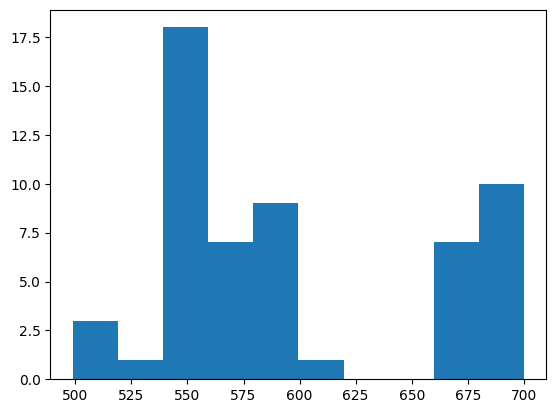

In [60]:
# plot histogram
import matplotlib.pyplot as plt
plt.hist(np.array(shapes)[:, 0],)

(array([ 1.,  0.,  0.,  3.,  0.,  0., 39.,  0., 12.,  1.]),
 array([600. , 616.6, 633.2, 649.8, 666.4, 683. , 699.6, 716.2, 732.8,
        749.4, 766. ]),
 <BarContainer object of 10 artists>)

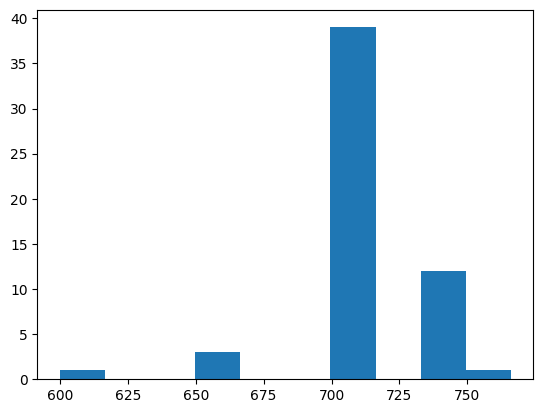

In [62]:
plt.hist(np.array(shapes)[:, 1])

## Resampling and reszing with nibabel

In [39]:
import h5py
import numpy as np
import nibabel as nib
import nibabel.processing as nibp
import matplotlib.pyplot as plt

In [40]:
ds = h5py.File('/scratch_net/biwidl319/jbermeo/data/preprocessed/UIA_segmentation/USZ.h5', 'r')

(0.6, 0.3, 0.6)


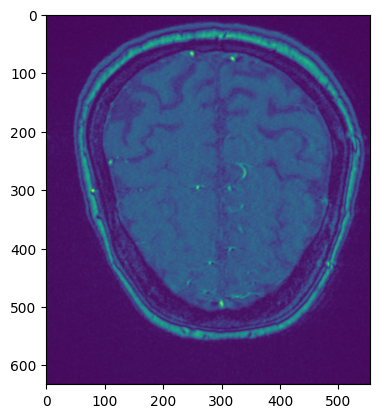

In [41]:
img_group = ds['data']['10896074_BRE_AComm_ICA']

image = img_group['tof'][:][0]
labels = img_group['seg'][:][0]
px = img_group['px'][()]
py = img_group['py'][()]
pz = img_group['pz'][()]


orig_voxel_size = (pz, py, pz)  
print(orig_voxel_size)
plt.imshow(image[60, :, :])

In [45]:
orig_voxel_size

(0.6, 0.3, 0.6)

In [43]:
# Create a nib image object with the original voxel size
affine = [
    [orig_voxel_size[0], 0, 0, 0],
    [0, orig_voxel_size[1], 0, 0], 
    [0, 0, orig_voxel_size[2], 0], 
    [0, 0, 0, 1]]
img = nib.Nifti1Image(image, affine)
img.header.set_zooms(orig_voxel_size)


In [157]:
%%timeit
a = nibp.conform(img, (150, 600, 460), voxel_size=(0.7, 0.3, 0.3), order=3)

10.8 s ± 49.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [159]:
1 / np.array([0.25, 1, 1])

array([4., 1., 1.])

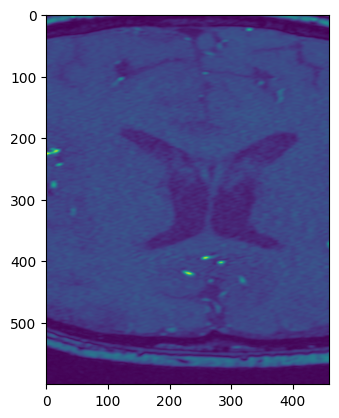

In [44]:
img = nibp.conform(img, (150, 600, 460), voxel_size=(0.7, 0.3, 0.3), order=3)  
plt.imshow(img.get_fdata()[60, :, :])

In [150]:
img.shape

(150, 600, 460)

### Check how the largest images look after cropping

In [23]:
target_size = [160, 560, 640]
target_resolution = (0.6, 0.3, 0.3)

(0.6, 0.3, 0.3)


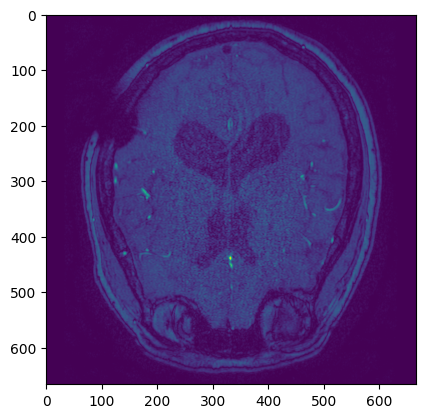

In [33]:
#img_group = ds['data']['10896074_BRE_AComm_ICA']
img_group = ds['data']['10147148-AComm-NEW']

image = img_group['tof'][:][0]
labels = img_group['seg'][:][0]
px = img_group['px'][()]
py = img_group['py'][()]
pz = img_group['pz'][()]


orig_voxel_size = (pz, px, py)  
print(orig_voxel_size)
plt.imshow(image[60, :, :])

In [34]:
affine = [
    [orig_voxel_size[0], 0, 0, 0],
    [0, orig_voxel_size[1], 0, 0], 
    [0, 0, orig_voxel_size[2], 0], 
    [0, 0, 0, 1]]
img = nib.Nifti1Image(image, affine)
img.header.set_zooms(orig_voxel_size)

In [35]:
img_cropped = nibp.conform(img, target_size, voxel_size=target_resolution, order=3)  


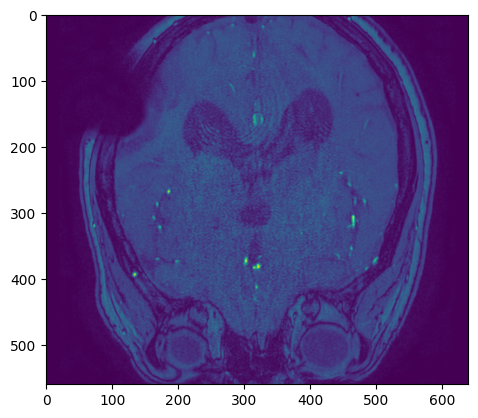

In [36]:
plt.imshow(img_cropped.get_fdata()[60, :, :])

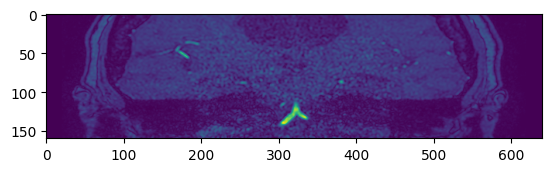

In [37]:
plt.imshow(img_cropped.get_fdata()[:, 275, :])

In [38]:
nib.save(img_cropped, f'largest_fov_largest_z_size_{target_size}_res_{target_resolution}_10147148-AComm-NEW_tof.nii.gz')

### Check how the dataset class is working

In [1]:
import sys
sys.path.append('/scratch_net/biwidl319/jbermeo/MastersThesisUIASegmentation/tta_uia_segmentation/src')

In [2]:
from dataset.dataset_h5 import DatasetH5
import matplotlib.pyplot as plt
import yaml
from pprint import pprint

In [3]:
config = yaml.load(open('/scratch_net/biwidl319/jbermeo/MastersThesisUIASegmentation/config/training_hcp_t1w.yaml', 'r'),
          Loader=yaml.FullLoader)

In [4]:
pprint(config['segmentation'])

{'augmentation': {'alpha': 1000,
                  'brightness_max': 0.1,
                  'brightness_min': 0.0,
                  'da_ratio': 0.25,
                  'gamma_max': 2.0,
                  'gamma_min': 0.5,
                  'noise_mean': 0.0,
                  'noise_std': 0.1,
                  'rot_max': 10,
                  'rot_min': -10,
                  'scale_max': 1.1,
                  'scale_min': 0.9,
                  'sigma': 20,
                  'trans_max': 10,
                  'trans_min': -10},
 'batch_size': 16,
 'bg_suppression_opts': {'bg_value': -0.5,
                         'bg_value_max': 1,
                         'bg_value_min': -0.5,
                         'hole_filling': True,
                         'mask_source': 'thresholding',
                         'thresholding': 'otsu',
                         'type': 'fixed_value'},
 'dataset': 'hcp_t1',
 'epochs': 150,
 'image_size': [1, 256, 256],
 'learning_rate': 0.001,
 'logdir': '/sc

In [5]:
bg_suppression_opts = config['segmentation']['bg_suppression_opts']
pprint(bg_suppression_opts)

{'bg_value': -0.5,
 'bg_value_max': 1,
 'bg_value_min': -0.5,
 'hole_filling': True,
 'mask_source': 'thresholding',
 'thresholding': 'otsu',
 'type': 'fixed_value'}


In [6]:
bg_suppression_opts['hole_filling'] = False
bg_suppression_opts['mask_source'] = 'ground_truth'

In [4]:
data_dir_path = '../../data/'
bias_corrected_data_dir_path = os.path.join(data_dir_path, 'preprocessed/0_bias_corrected/USZ')
raw_data_dir_path = os.path.join(data_dir_path, 'raw/USZ')

In [24]:
fps = glob.glob(os.path.join(bias_corrected_data_dir_path, '*'))

In [25]:
fps

['../../data/preprocessed/0_bias_corrected/USZ/10107525-MCA-new-Colors',
 '../../data/preprocessed/0_bias_corrected/USZ/10811755_CC_AComm_NEW',
 '../../data/preprocessed/0_bias_corrected/USZ/60213089-MCA-ICA-NEW',
 '../../data/preprocessed/0_bias_corrected/USZ/10764179-MCA-NEW_DONE',
 '../../data/preprocessed/0_bias_corrected/USZ/11096773_IB_PComm',
 '../../data/preprocessed/0_bias_corrected/USZ/60201588-MCA-NEW_DONE',
 '../../data/preprocessed/0_bias_corrected/USZ/10731286-ICA-links-NEW',
 '../../data/preprocessed/0_bias_corrected/USZ/11047954_LM_Pericallosa',
 '../../data/preprocessed/0_bias_corrected/USZ/10104830_ZG_ComplexICA_Checked',
 '../../data/preprocessed/0_bias_corrected/USZ/10299485_BMM_AComm_MCA_Checked',
 '../../data/preprocessed/0_bias_corrected/USZ/10266790_CL_ICA_Checked',
 '../../data/preprocessed/0_bias_corrected/USZ/10599468-AComm-new',
 '../../data/preprocessed/0_bias_corrected/USZ/10019209_EK_MCA_Checked',
 '../../data/preprocessed/0_bias_corrected/USZ/10986737_SH

In [28]:
missing_seg_mask = [ ]
for fp in fps:
    scans = glob.glob(os.path.join(fp, '*.nii.gz'))
    
    if len(scans) == 1:
        missing_seg_mask.append(fp)
        
    elif len(scans) == 0:
        print(f'{fp} has no scans at all')

In [29]:
missing_seg_mask

[]

In [5]:
for a in ds:
    break

(1, 111, 566, 566) (1, 111, 566, 566) (1, 111, 566, 566)


RuntimeError: sequence argument must have length equal to input rank

In [70]:
a[4]

array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  Tr

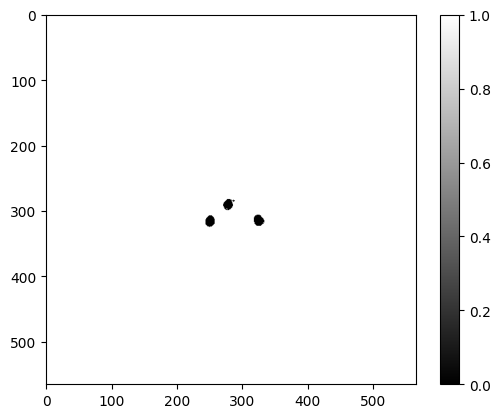

In [71]:
# Print image with a color bar showing the pixel values
plt.imshow(a[4][60, :, :], cmap='gray', vmin=0, vmax=1)
plt.colorbar()